Colab was used because of my system's limitations. This notebook was downloaded from my personal colab directory.

In [ ]:
!pip install kaggle

In [ ]:
!wget https://isic-challenge-data.s3.amazonaws.com/2020/ISIC_2020_Training_JPEG.zip
!wget https://isic-challenge-data.s3.amazonaws.com/2020/ISIC_2020_Training_GroundTruth_v2.csv
!wget https://isic-challenge-data.s3.amazonaws.com/2020/ISIC_2020_Training_Duplicates.csv

--2025-02-12 14:43:51--  https://isic-challenge-data.s3.amazonaws.com/2020/ISIC_2020_Training_JPEG.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 3.5.20.66, 16.182.108.41, 3.5.7.141, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|3.5.20.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24707698022 (23G) [application/zip]
Saving to: ‘ISIC_2020_Training_JPEG.zip’

ISIC_2020_Training_ 100%[===================>]  23.01G  35.6MB/s    in 10m 43s 

2025-02-12 14:54:34 (36.7 MB/s) - ‘ISIC_2020_Training_JPEG.zip’ saved [24707698022/24707698022]

--2025-02-12 14:54:34--  https://isic-challenge-data.s3.amazonaws.com/2020/ISIC_2020_Training_GroundTruth_v2.csv
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 3.5.6.101, 3.5.29.116, 52.217.135.169, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|3.

In [ ]:
!unzip /content/ISIC_2020_Training_JPEG.zip -d /content/train

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/train/ISIC_4667975.jpg  
  inflating: /content/train/train/ISIC_7672567.jpg  
  inflating: /content/train/train/ISIC_1870377.jpg  
  inflating: /content/train/train/ISIC_5941271.jpg  
  inflating: /content/train/train/ISIC_0298093.jpg  
  inflating: /content/train/train/ISIC_3830701.jpg  
  inflating: /content/train/train/ISIC_0528791.jpg  
  inflating: /content/train/train/ISIC_4167610.jpg  
  inflating: /content/train/train/ISIC_9392704.jpg  
  inflating: /content/train/train/ISIC_6084191.jpg  
  inflating: /content/train/train/ISIC_0242801.jpg  
  inflating: /content/train/train/ISIC_7763042.jpg  
  inflating: /content/train/train/ISIC_2256519.jpg  
  inflating: /content/train/train/ISIC_4575717.jpg  
  inflating: /content/train/train/ISIC_9407667.jpg  
  inflating: /content/train/train/ISIC_4187485.jpg  
  inflating: /content/train/train/ISIC_4576846.jpg  
  inflating: /content/train/train/ISIC_0736928.j

In [ ]:
!wget https://isic-challenge-data.s3.amazonaws.com/2020/ISIC_2020_Training_GroundTruth.csv

--2025-02-12 15:06:42--  https://isic-challenge-data.s3.amazonaws.com/2020/ISIC_2020_Training_GroundTruth.csv
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 52.216.205.67, 3.5.29.229, 3.5.16.59, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|52.216.205.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2056020 (2.0M) [text/csv]
Saving to: ‘ISIC_2020_Training_GroundTruth.csv’

ISIC_2020_Training_ 100%[===================>]   1.96M  5.37MB/s    in 0.4s    

2025-02-12 15:06:43 (5.37 MB/s) - ‘ISIC_2020_Training_GroundTruth.csv’ saved [2056020/2056020]



In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

In [ ]:
df = pd.read_csv('/content/ISIC_2020_Training_GroundTruth_v2.csv')

df['image_name'] = df['image_name'].apply(lambda x: x + '.jpg')
print(df.head())


         image_name  patient_id   lesion_id     sex  age_approx  \
0  ISIC_2637011.jpg  IP_7279968  IL_7972535    male        45.0   
1  ISIC_0015719.jpg  IP_3075186  IL_4649854  female        45.0   
2  ISIC_0052212.jpg  IP_2842074  IL_9087444  female        50.0   
3  ISIC_0068279.jpg  IP_6890425  IL_4255399  female        45.0   
4  ISIC_0074268.jpg  IP_8723313  IL_6898037  female        55.0   

  anatom_site_general_challenge diagnosis benign_malignant  target  
0                     head/neck   unknown           benign       0  
1               upper extremity   unknown           benign       0  
2               lower extremity     nevus           benign       0  
3                     head/neck   unknown           benign       0  
4               upper extremity   unknown           benign       0  


In [ ]:
metadata = df
metadata['target'] = metadata['target'].astype(str)
small_metadata, _ = train_test_split(metadata, test_size=0.9, stratify=metadata['target'], random_state=42)
train_df, val_df = train_test_split(small_metadata, test_size=0.2, stratify=small_metadata['target'], random_state=42)

In [ ]:
metadata.head()

,image_name,patient_id,lesion_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011.jpg,IP_7279968,IL_7972535,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719.jpg,IP_3075186,IL_4649854,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212.jpg,IP_2842074,IL_9087444,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279.jpg,IP_6890425,IL_4255399,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268.jpg,IP_8723313,IL_6898037,female,55.0,upper extremity,unknown,benign,0


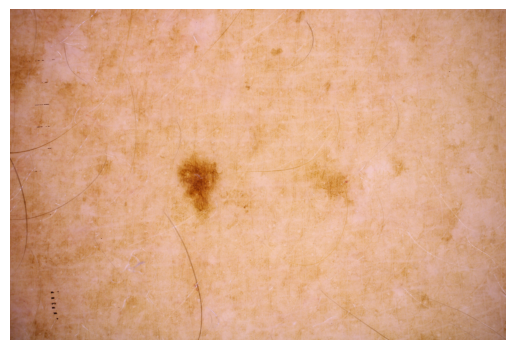

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = '/content/train/train/ISIC_0015719.jpg'
img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
#Function to add noise to images
def add_noise(image):
    noise_factor = 0.2
    noise = np.random.randn(*image.shape) * noise_factor
    image = image + noise
    image = np.clip(image, 0., 1.)
    return image

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=add_noise
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory='/content/train/train/',
    x_col='image_name',
    y_col='target',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    directory='/content/train/train/',
    x_col='image_name',
    y_col='target',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 2649 validated image filenames belonging to 2 classes.
Found 663 validated image filenames belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │         525,3

 Total params: 17,866,565 (68.16 MB)

 Trainable params: 1,050,625 (4.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2,101,252 (8.02 MB)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 382s 5s/step - accuracy: 0.9606 - loss: 0.1528 - val_accuracy: 0.9819 - val_loss: 0.0956
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 290s 4s/step - accuracy: 0.9822 - loss: 0.0899 - val_accuracy: 0.9819 - val_loss: 0.0933
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 305s 4s/step - accuracy: 0.9802 - loss: 0.1016 - val_accuracy: 0.9819 - val_loss: 0.0951
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 287s 3s/step - accuracy: 0.9829 - loss: 0.0913 - val_accuracy: 0.9819 - val_loss: 0.0923
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 337s 4s/step - accuracy: 0.9806 - loss: 0.1057 - val_accuracy: 0.9819 - val_loss: 0.1168
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 302s 3s/step - accuracy: 0.9880 - loss: 0.0719 - val_accuracy: 0.9819 - val_loss: 0.0911
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 301s 4s/step - accuracy: 0.9853 - loss: 0.0827 - val_accuracy: 0.9819 - val_loss: 0.0918
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 276s 3s/step - accuracy: 0.9841 - loss: 0.0873 - val_accuracy: 0.9819 - v

In [ ]:
model.save('skin_cancer_model_VGG16_v1.h5')